# Assignment 13 : KNN_ZOO_Data
Implement a KNN model to classify the animals into categories

# Import required lib

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

## Import dataset

In [2]:
zoo_data=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Machine Learning\\KNN\\zoo.csv")
zoo_data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Initial Analysis

In [3]:
zoo_data.shape

(101, 18)

In [4]:
zoo_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [5]:
zoo_data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
zoo_data[zoo_data.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [7]:
zoo_data['animal name'].nunique()

100

In [8]:
zoo_data1 = zoo_data.rename(columns = {'animal name':'animal_name'})
zoo_data1.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
duplicate = zoo_data1.animal_name.value_counts()
duplicate[duplicate>1]

frog    2
Name: animal_name, dtype: int64

In [10]:
data = zoo_data1.loc[zoo_data1['animal_name']=='frog']
data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [11]:
zoo_data1['animal_name'][(zoo_data1.venomous==1)&(zoo_data1.animal_name =='frog')] ='frog2'

In [12]:
zoo_data1['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [13]:
zoo_new = zoo_data1.drop(labels = 'animal_name',axis = 1)

In [14]:
zoo_new.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [15]:
zoo_new.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

## visualization plot

In [16]:
cor = zoo_data.corr()
cor

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


<AxesSubplot:>

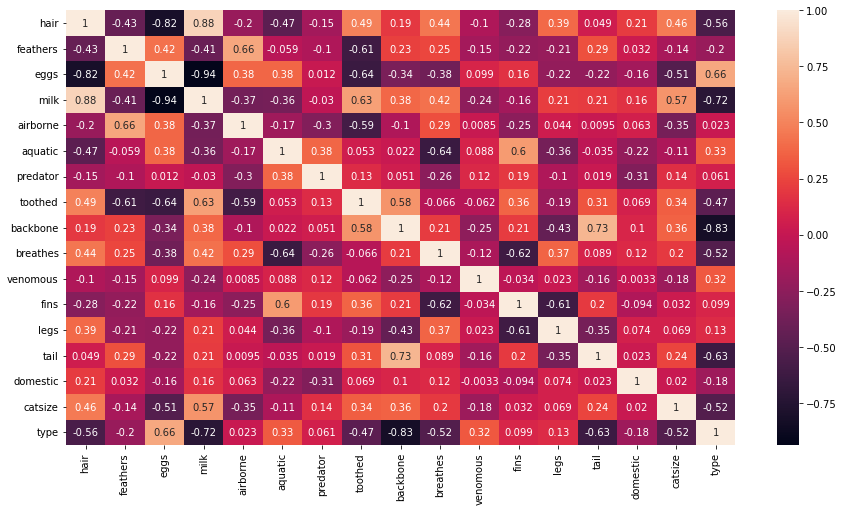

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(cor,annot = True)

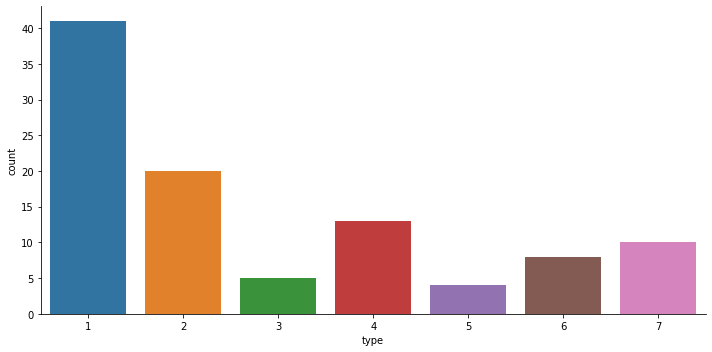

In [19]:
sns.factorplot('type',data = zoo_data,kind="count",size = 5,aspect = 2)

## model building

In [20]:
x = zoo_new.drop(labels = 'type',axis = 1)
y = zoo_new[['type']]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1, stratify=y)

In [22]:
x_train.shape,y_train.shape

((80, 16), (80, 1))

In [23]:
x_test.shape,y_test.shape

((21, 16), (21, 1))

## model training

In [24]:
# k = 5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
# training data
y_train_pred = knn_model.predict(x_train)

In [26]:
accuracy_score(y_train,y_train_pred)

0.925

In [27]:
# testing data
y_test_pred = knn_model.predict(x_test)

In [28]:
accuracy_score(y_test,y_test_pred)

0.8571428571428571

## find out the optimum number for k

In [29]:
cv_scores=[]
for i in range(1,25,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_score = cross_val_score(estimator=knn,X= x,y = y,cv=5)
    cv_scores.append(cv_score.mean())
    print('neighbors ',i,round(cv_score.mean(),4))

neighbors  1 0.97
neighbors  3 0.93
neighbors  5 0.851
neighbors  7 0.8414
neighbors  9 0.7919
neighbors  11 0.7819
neighbors  13 0.7819
neighbors  15 0.7819
neighbors  17 0.7819
neighbors  19 0.7819
neighbors  21 0.7419
neighbors  23 0.7129


In [30]:
# second model
# k = 5
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
y_train_pred1 = knn_model.predict(x_train)

In [32]:
# training data
accuracy_score(y_train,y_train_pred1)

0.9625

In [33]:
y_test_pred1= knn_model.predict(x_test)

In [34]:
accuracy_score(y_test,y_test_pred1)

1.0

Text(0, 0.5, 'Accuracy')

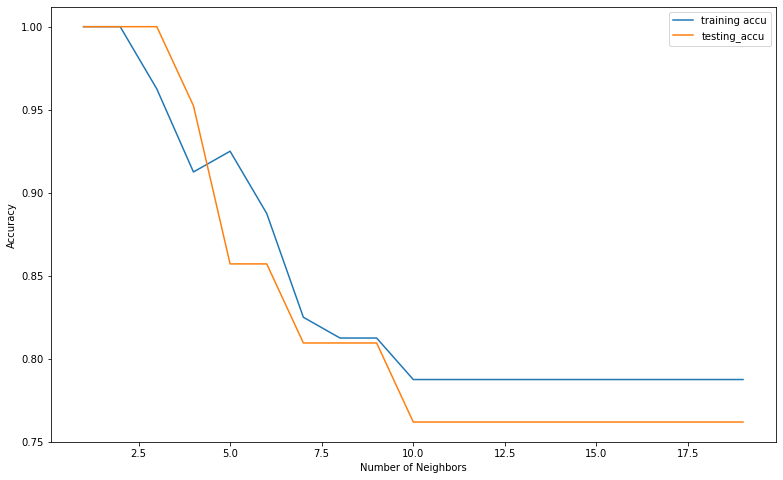

In [35]:
training_accu = []
testing_accu = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    training_accu.append(knn.score(x_train,y_train))
    testing_accu.append(knn.score(x_test,y_test))

plt.figure(figsize=(13,8))
plt.plot(range(1,20),training_accu, label = 'training accu')
plt.plot(range(1,20),testing_accu, label = 'testing_accu' )
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

In [36]:
np.max(training_accu)

1.0

In [37]:
np.max(testing_accu)

1.0

In [38]:
1 + training_accu.index(np.max(training_accu))

1

In [39]:
1+testing_accu.index(np.max(testing_accu))

1

# END